# FEATURE ENGINEERING PART1

What are the Different Types of Missing Data?

 Missing data is either: structurally missing, missing completely at random (MCAR), missing at random, or nonignorable (also known as missing not at random). Different types of missing data need to be treated differently in order for any analysis to be meaningful.

# Structurally missing data:

it is data that is missing because it should not exist.
eg; if we were asked age of our children but when we don't have children we can't fill any value in it


# Missing completely at random (MCAR).

 

When data are MCAR, the fact that the data are missing is independent of the observed and unobserved data.15 
In other words, no systematic differences exist between participants with missing data and those with complete data.
For example, some participants may have missing laboratory values because a batch of lab samples was processed
improperly. In these instances, the missing data reduce the analyzable population of the study and consequently, 
the statistical power, but do not introduce bias: when data are MCAR, the data which remain can be considered a 
simple random sample of the full data set of interest. MCAR is generally regarded as a strong and often 
unrealistic assumption.

WHEN WE HAVE (MCAR) WE USE replace by mean/median/mode method

In [90]:
import pandas as pd


In [91]:
df=pd.read_csv('titanic_train.csv')
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [92]:
df.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
boat            542
body            777
home.dest       386
survived          0
dtype: int64

In [93]:
df['embarked'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
845    False
846    False
847    False
848    False
849    False
Name: embarked, Length: 850, dtype: bool

In [94]:
df[df['embarked'].isnull()]

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
109,168,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,6,NaN,NaN,1


MISSING NOT AT RANDOM

complete case analysis of a data set containing MNAR data may or may not result in bias

Structurally missing data is easy to analyze, whereas other forms of missing not at random data are highly problematic.

When data is missing not at random, it means that we cannot use any of the standard methods for
dealing with missing data (e.g., imputation, or algorithms specifically designed for missing values).
If the missing data is missing not at random, any standard calculations give the wrong answer.

In [95]:
df.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


In [96]:
df['cabin'].isnull().sum()

659

In [97]:
import numpy as np

In [98]:
df['cabin_null']=np.where(df['cabin'].isnull(),1,0)

In [99]:
df.columns # CABIN IS REPLACED BY CABIN_NULL

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest',
       'survived', 'cabin_null'],
      dtype='object')

In [100]:
df.groupby(['survived'])['cabin_null'].mean()

survived
0    0.880819
1    0.594249
Name: cabin_null, dtype: float64

In [101]:
df.groupby(['cabin_null'])['survived'].mean()

cabin_null
0    0.664921
1    0.282246
Name: survived, dtype: float64

In [102]:
df.groupby(['sibsp'])['survived'].mean()

sibsp
0    0.333333
1    0.502347
2    0.440000
3    0.166667
4    0.142857
5    0.000000
8    0.000000
Name: survived, dtype: float64

In [103]:
df.groupby(['survived'])['sibsp'].mean()

survived
0    0.560521
1    0.456869
Name: sibsp, dtype: float64

In [104]:
# Missing at random
eg:
    men- hide their salary
    women- hide thier age

SyntaxError: invalid syntax (<ipython-input-104-f8a9582c0d93>, line 2)

# ALL TECHINQUES OF HANDILING MISSING VALUES
1)mean/median/mode replacement
2) random sample imputation
3) capturing man values with a new feature
4)end of distrubution imputation
5)arbitary imputation
6)frequent categories imputation

In [105]:
df=pd.read_csv('titanic_train.csv',usecols=['age','fare'])
df.head()

,age,fare
0,NaN,7.7333
1,38.0,8.6625
2,30.0,24.1500
3,54.0,23.0000
4,40.0,13.0000


In [106]:
median=df['age'].median()
median

28.0

# REPLACE BY MEDIAN

In [107]:
df['Age_median']=df["age"].fillna(median) # or we can also replace by data['age'].replace(np.NaN,data['age'].median())

In [108]:
df # WE CAN DO BY ABOVE METHOD OR WE CAN CREATE FUNCTION    

,age,fare,Age_median
0,NaN,7.7333,28.0
1,38.0,8.6625,38.0
2,30.0,24.1500,30.0
3,54.0,23.0000,54.0
4,40.0,13.0000,40.0
...,...,...,...
845,55.0,50.0000,55.0
846,58.0,29.7000,58.0
847,24.0,26.0000,24.0
848,3.0,13.7750,3.0


In [111]:
def impute(variable):    # WE CAN DO BY THIS TOO JUST DEFINE A FUNCTION
    df[variable+'median']=df[variable].fillna(median)

In [113]:
impute('age')
df

,age,fare,Age_median,agemedian
0,NaN,7.7333,28.0,28.0
1,38.0,8.6625,38.0,38.0
2,30.0,24.1500,30.0,30.0
3,54.0,23.0000,54.0,54.0
4,40.0,13.0000,40.0,40.0
...,...,...,...,...
845,55.0,50.0000,55.0,55.0
846,58.0,29.7000,58.0,58.0
847,24.0,26.0000,24.0,24.0
848,3.0,13.7750,3.0,3.0


In [32]:
print(df['age'].std())               # STD=STANDARD DEVIATION
print(df['Age_median'].std())       # STD CHANGE IS VERY SMALL

14.562243434125529
12.999022882894222


In [37]:
import matplotlib.pyplot as plt

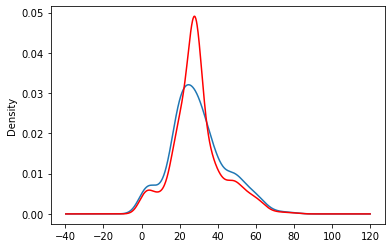

In [43]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['age'].plot(kind='kde',ax=ax) 
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()

REPLCING WITH MEAN/ MEDIAN/ MODE 
 
 
 Pros:

    This is a better approach when the data size is small
    It can prevent data loss which results in removal of the rows and columns

Cons:

    Imputing the approximations add variance and bias
    Works poorly compared to other multiple-imputations method


# DELETING ROWS

Pros:

    Complete removal of data with missing values results in robust and highly accurate model
    Deleting a particular row or a column with no specific information is better, since it does not have a high weightage

Cons:

    Loss of information and data
    Works poorly if the percentage of missing values is high (say 30%), compared to the whole dataset


we either delete a particular row if it has a null value for a particular feature 
and a particular column if it has more than 70-75% of missing values.
This method is advised only when there are enough samples in the data set. 
One has to make sure that after we have deleted the data, there is no addition of bias.
Removing the data will lead to loss of information which will not give the 
expected results while predicting the output.

# 3. Assigning An Unique Category



A categorical feature will have a definite number of possibilities, such as gender, 
for example. Since they have a definite number of classes, we can assign another class for the missing values.
Here, the features Cabin and Embarked have missing values which can be replaced with a new category,
say, U for ‘unknown’. This strategy will add more information into the dataset which will result in the change 
of variance. Since they are categorical, we need to find one hot encoding to convert it to a numeric form for
the algorithm to understand it. Let us look at how it can be done in Python:

In [67]:
df['age'].fillna('u').head()

0       u
1    38.0
2    30.0
3    54.0
4    40.0
Name: age, dtype: object

Pros:

    Less possibilities with one extra category, resulting in low variance after one hot encoding — since it is categorical
    Negates the loss of data by adding an unique category

Cons:

    Adds less variance
    Adds another feature to the model while encoding, which may result in poor performance


# 4. Predicting The Missing Values

Using the features which do not have missing values, we can predict the nulls with the help of a machine learning algorithm. This method may result in better accuracy, unless a missing value is expected to have a very high variance. We will be using linear regression to replace the nulls in the feature ‘age’, using other available features. One can experiment with different algorithms and check which gives the best accuracy instead of sticking to a single algorithm. 

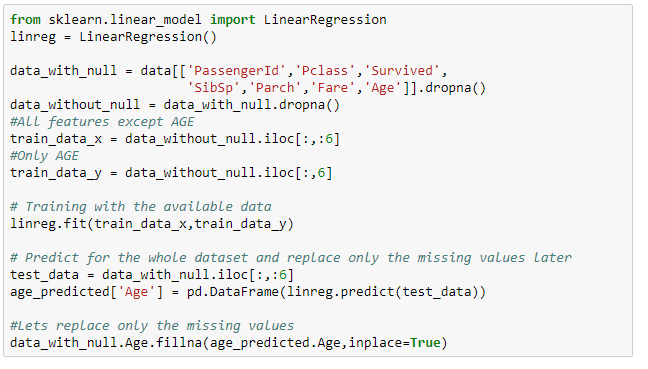

In [69]:
dk=pd.read_csv('titanic_train.csv')
dk.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


Pros:

    Imputing the missing variable is an improvement as long as the bias from the same is smaller than the omitted       variable bias
    Yields unbiased estimates of the model parameters

Cons:

    Bias also arises when an incomplete conditioning set is used for a categorical variable
    Considered only as a proxy for the true values


# 5. Using Algorithms Which Support Missing Values

KNN is a machine learning algorithm which works on the principle of distance measure. This algorithm can be used when there are nulls present in the dataset. While the algorithm is applied, KNN considers the missing values by taking the majority of the K nearest values. In this particular dataset, taking into account the person’s age, sex, class etc, we will assume that people having same data for the above mentioned features will have the same kind of fare.

Unfortunately, the SciKit Learn library for the K – Nearest Neighbour algorithm in Python does not support the presence of the missing values.

Another algorithm which can be used here is RandomForest. This model produces a robust result because it works well on non-linear and the categorical data. It adapts to the data structure taking into consideration of the high variance or the bias, producing better results on large datasets.

Pros:

    Does not require creation of a predictive model for each attribute with missing data in the dataset
    Correlation of the data is neglected

Cons:

    Is a very time consuming process and it can be critical in data mining where large databases are being extracted
    Choice of distance functions can be Euclidean, Manhattan etc. which is do not yield a robust result


Conclusion

Every dataset we come across will almost have some missing values which need to be dealt with. But handling them in an intelligent way and giving rise to robust models is a challenging task. We have gone through a number of ways in which nulls can be replaced. It is not necessary to handle a particular dataset in one single manner. One can use various methods on different features depending on how and what the data is about. Having a small domain knowledge about the data is important, which can give you an insight about how to approach the problem.